# Notebook MUD/RUNNER 
# Desafio Técnico Competição Regional BAJA SAE

# Anotações Gerais:

### Informações acerca da obtenção dos dados:
>Event: 2014 Targa 66<br>
Venue: Palm Beach International Raceway<br>
Date: 2014-02-21<br>
Driver: Participant 3<br>
Vehicle: 1965 Ferrari 250 LM Berlinetta GT<br>

Estamos enumerando os datasets de 0 a 3, com base nessas informações.

| Informação | Dataset 0 | Dataset 1 | Dataset 2 | Dataset 3  |
| ---------- | --------- | --------- | --------- | --------- |
| Time (UTC) | 14:29:02  | 14:37:58  | 16:07:11  | 18:43:46  |
| Session | 01 | 01 | 02 | 03 |
| Outing | 01 | 02 | 01 | 01 |



### Ponto de Largada
<p>O ponto de partida da pista foi arbitrado a partir das cordenadas geográficas coletadas, se baseando na pista Palm Beach International Raceway. Com isso, define-se o início e o final de qualquer volta. Como a pista para todos os datasets foi a mesma, utilizou-se da mesma regra para todos os datasets.</p>
<p>A coordenada foi arbitrada após a análise do gráfico posição latitudinal x posição longitudinal de todos os datasets. Uma volta se inicia ou termina no primeiro instante (tempo) em que os dados correspondem às condições: Latitude aproximada para 4 casas decimais igual 26.9216 e longitude aproximada para 4 casas decimais menor que -80.3056. A demarcação azul no gráfico demonstra a posição das coordenadas que se encaixam nessas regras.</p>

        Como foi feita a busca:
    tabela = tabela[round(tabela["latitude"], 4) == 26.9216]
    tabela = tabela[round(tabela["longitude"], 4) < -80.3056]

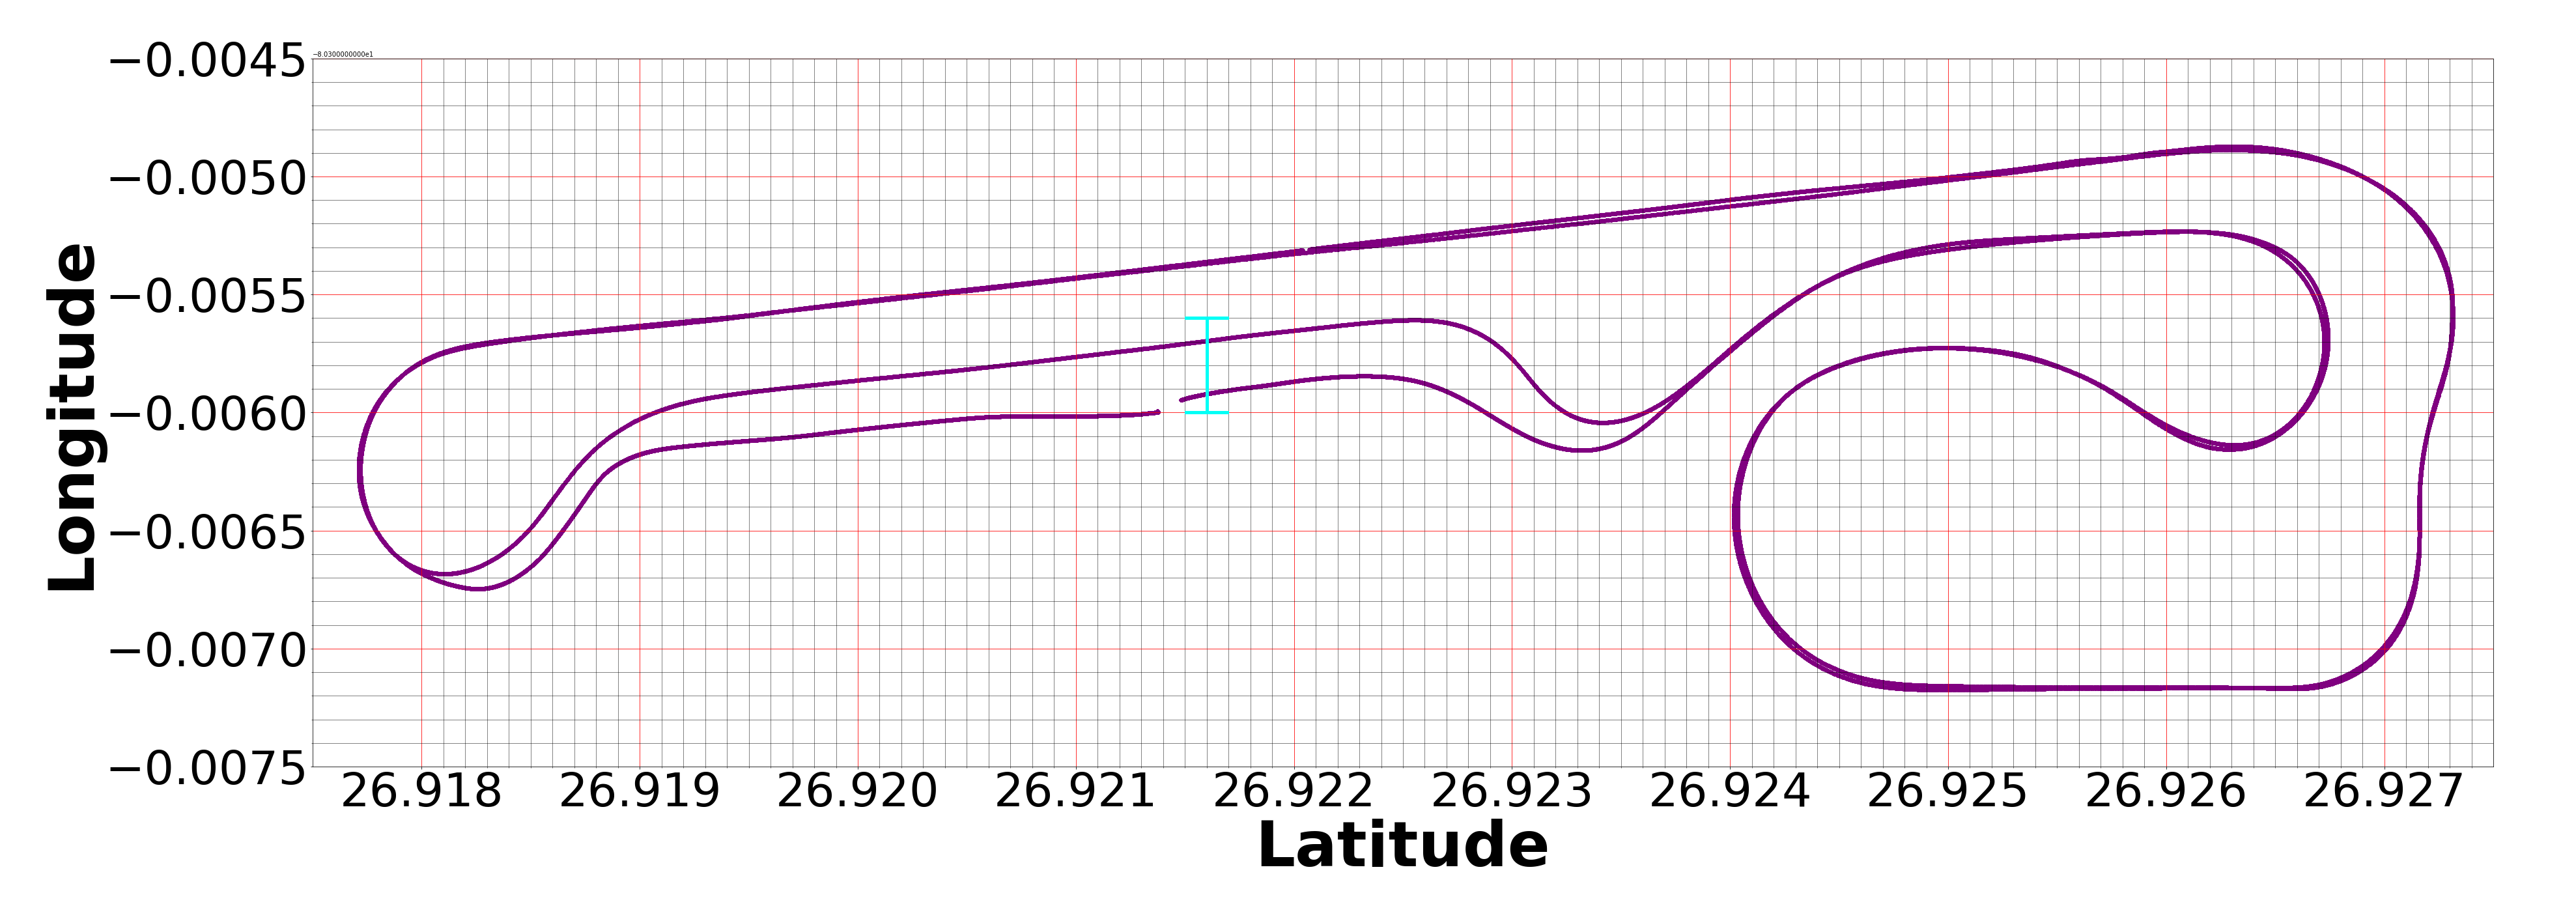
    
### Tempos de voltas
<p>Usando as coordenadas (26.9216, -80.3056) como referência, é possível encontrar os momentos em que o piloto atravessa essas coordenadas. Nota-se que para cada conjunto de dados, o primeiro tempo representa o início da primeira volta e o último dado o fim da última volta. Os dados após o fim da última volta são referentes a volta do piloto para o box - que, nessas circunstâncias, não cruza mais a linha de chegada. O código para encontrar os timeStamps está na sessão "Encontrando os Timestamps".</p>
    
    [t0, t1, t2, ... tn], onde:
    t0 é início das voltas, t1 é fim da primeira volta e início da segunda e tn é o fim da última volta
    
    timeStamps = {
    [45.62, 187.13],                                # Tempos dataset0
    [234.8, 351.13, 459.19, 562.5],                 # Tempos dataset1
    [38.09, 152.9, 254.93, 357.29, 456.11, 552.21], # Tempos dataset2
    [152.57, 264.46]                                # Tempos dataset3
    }
    
### Velocidade absoluta média, máxima, tempo das voltas e distância percorrida
<p>Dentre os dados disponibilizados, existe um canal chamado "horizontalSpeed". A velocidade horizontal se refere a velocidade absoluta do carro nos eixos horizontais (comprimento (frente/trás) e largura (esquerda/direita)), o que exclui o eixo vertical (cima/baixo, ou altura). A adequada discriminação dos dados permite a criação de uma tabela apenas com os momentos de interesse para os cálculos das velocidades média e máxima. Optou-se por considerar como válidos apenas os dados que estão inseridos nos momentos das voltas, para cada dataset. A volta para o box e qualquer momento antes do piloto cruzar a largada serão desconsiderados.</p>
<p>Simultaneamente, como se optou por iterar pela descrição das tabelas (funcionalidade da biblioteca pandas, que fornece dados estatísticos) para encontrar os dados, calculou-se também o tempo de cada volta. A diferença (em valores absolutos) entre um timeStamp e o próximo é o tempo que o piloto levou para concluir aquela volta. O código e os passos estão na sessão do notebook "Velocidade absoluta média, máxima e tempo das voltas".</p>
<p>Por fim, com o tempo de cada volta e a velocidade média percorrida, pode-se calcular a distância percorrida em cada volta. Esse valor não representa exatamente o comprimento da pista - já que a pista é larga e o piloto pode fazer curvas abertas ou fechadas. O comprimento da pista, em função de regulamentos, é a média entre o comprimento das paredes internas e das paredes externas: simulando um piloto que sempre passa pelo centro da pista, nunca nos cantos internos e externos.</p>
<br></br>

| DatasetRef | NumVolta | TempoVolta |  VelMedia  | VelMax | DistPerc |
| ---------- | -------- | ---------- |  --------  | ------ | ------------- |
| Dataset 0  | Volta 1  |  141.510s  | 22.055 m/s | 33.96 m/s | 3121.01 m |
| Dataset 1  | Volta 1  |  116.330s  | 26.746 m/s | 53.64 m/s | 3111.31 m |
| Dataset 1  | Volta 2  |  108.060s  | 28.708 m/s | 55.67 m/s | 3102.22 m |
| Dataset 1  | Volta 3  |  103.310s  | 30.124 m/s | 56.62 m/s | 3112.06 m |
| Dataset 2  | Volta 1  |  114.810s  | 27.075 m/s | 52.31 m/s | 3108.47 m |
| Dataset 2  | Volta 2  |  102.030s  | 30.434 m/s | 56.57 m/s | 3105.14 m |
| Dataset 2  | Volta 3  |  102.360s  | 30.313 m/s | 58.86 m/s | 3102.83 m |
| Dataset 2  | Volta 4  |  98.820s  | 31.510 m/s | 60.13 m/s | 3113.79 m |
| Dataset 2  | Volta 5  |  96.100s  | 32.353 m/s | 60.55 m/s | 3109.10 m |
| Dataset 3  | Volta 1  |  111.890s  | 27.746 m/s | 55.3 m/s | 3104.47 m |

<br></br>
<p>Como o piloto busca realizar curvas fechadas (para reduzir a distância percorrida e, consequentemente, o tempo da volta), é seguro dizer que a distância percorrida pelo piloto é, na maioria dos casos, menor que o comprimento da pista. Ao se comparar o maior valor encontrado (3121m) com o comprimento oficial da pista (3200m), encontra-se um erro aproximado de 2,5%.</P>

# Biblotecas

In [1]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.animation as animation
from IPython.display import clear_output

# Para salvar videos em ffmpeg é necessário baixar os plugins. Há pacotes instaláveis no Conda ou,
# alternativamente, pode-se instalar por fora e adicionar ao Path do Windows.
# Por fim, pode-se instalar em qualquer lugar e referir para o matplotlib onde encontrá-lo com:
# plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

# Leitura dos arquivos

In [2]:
# Declaração de variáveis, data types e funções para os dataframes e outros cálculos
dtypes = {
    "time": float,
    "handwheelAngle": float,
    "throttle": float,
    "brake": float,
    "clutch": float,
    "engineSpeed": float,
    "PPS": float,
    "gpsTime": float,
    "latitude": float,
    "longitude": float,
    "altitude": float, 
    "vNorth": float,
    "vEast": float,
    "vUp": float,
    "horizontalSpeed": float,
    "vxCG": float,
    "vyCG": float,
    "vzCG": float,
    "axCG": float,
    "ayCG": float,
    "azCG": float,
    "yawAngle": float,
    "pitchAngle": float,
    "rollAngle": float,
    "rollRate": float,
    "pitchRate": float,
    "yawRate": float,
    "sideSlip": float,
    "distance": float,
    "numSVsTracked": float,
    "gpsPosMode": float,
    "gpsVelMode": float,
    "gpsOrientMode": float,
    "HDOP": float,
    "PDOP": float,
    "posAccuracy_north": float,
    "posAccuracy_east": float,
    "posAccuracy_down": float,
    "velAccuracy_north": float,
    "velAccuracy_east": float,
    "velAccuracy_down": float,
    "orientAccuracy_heading": float,
    "orientAccuracy_pitch": float,
    "orientAccuracy_roll": float,
    "chassisAccelFL": float,
    "chassisAccelFR": float,
    "chassisAccelRL": float,
    "chassisAccelRR": float,
    "deflectionFL": float,
    "deflectionFR": float,
    "deflectionRR": float,
    "deflectionRR": float,
    "wheelAccelFL": float,
    "wheelAccelFR": float,
    "wheelAccelRL": float,
    "wheelAccelRR": float,
}

names = ["time","handwheelAngle","throttle","brake","clutch","engineSpeed","PPS","gpsTime",
         "latitude","longitude","altitude","vNorth","vEast","vUp","horizontalSpeed","vxCG",
         "vyCG","vzCG","axCG","ayCG","azCG","yawAngle","pitchAngle","rollAngle","rollRate",
         "pitchRate","yawRate","sideSlip","distance","numSVsTracked","gpsPosMode","gpsVelMode",
         "gpsOrientMode","HDOP","PDOP","posAccuracy_north","posAccuracy_east","posAccuracy_down",
         "velAccuracy_north","velAccuracy_east","velAccuracy_down","orientAccuracy_heading",
         "orientAccuracy_pitch","orientAccuracy_roll","chassisAccelFL","chassisAccelFR",
         "chassisAccelRL","chassisAccelRR","deflectionFL","deflectionFR","deflectionRL",
         "deflectionRR","wheelAccelFL","wheelAccelFR","wheelAccelRL","wheelAccelRR"]

QTD_DATASETS = 4
dsarray = [] # Array de datasets. dsarray[i] = dataseti.csv
# ds1 = pd.read_csv("dataset1.csv", encoding ="ISO-8859-1", on_bad_lines='skip', dtype=dtypes, skiprows = 12, names = names1e4)

for i in range(QTD_DATASETS):
    dsfilename = "dataset" + str(i) + ".csv"
    dsarray.append(pd.read_csv(dsfilename, encoding ="ISO-8859-1", on_bad_lines='skip',
                        dtype=dtypes, skiprows = 12, names = names)) 

timeStamps = [
    [45.62, 187.13], # Tempos dataset0
    [234.8, 351.13, 459.19, 562.5], # Tempos dataset1
    [38.09, 152.9, 254.93, 357.29, 456.11, 552.21], #Tempos dataset2
    [152.57, 264.46] # Tempos dataset3
]
timeStampsRound = [
    [46, 187], # Tempos dataset0
    [235, 351, 459, 563], # Tempos dataset1
    [38, 153, 255, 357, 456, 552], #Tempos dataset2
    [153, 264] # Tempos dataset3
]

# Funções

In [3]:
# Definição de funções usadas

def vAbsoluta(vNorth, vEast):
    return ((abs(vEast)**2 + abs(vNorth)**2)**(1/2))

def computeCircuitNumber(timeStamp):
    if timeStamp in timeStampsRound[dataset_global]:
        global lapNumber
        lapNumber = lapNumber + 1
    if  lapNumber >= 0:
        if len(lapTimes) == lapNumber:
            lapTimes.append(1)
        else:
            lapTimes[lapNumber] += 1
    return lapNumber, lapTimes      

def init():
        line.set_data([], [])
        return line,

def animate(i):
        dft = dsf[(dsf.index == i)]
        x = dft['latitude'].values[0]
        y = dft['longitude'].values[0]
        x_data.append(x)
        y_data.append(y)
        lapNum, lapTimes = computeCircuitNumber(dft["time"].values[0])
        horizontalSpeed = dft['horizontalSpeed'].values[0]
        
        speedText.set_text("Velocidade: " + str(round(horizontalSpeed,2)) + " m/s")
        title.set_text("Tempo em segundos: " + str(dft["time"].values[0]) + "s")
        xlabel.set_text("Latitude: " + str(x))
        ylabel.set_text("Longitude: " + str(y))
        if lapNum < 0:
            text.set_text('Carro fora da pista')

        else:
            text.set_text('Volta ' + str(lapNum+1) + ': ' + str(lapTimes[lapNum]) + ' segundos')

        if len(x_data) > 1:
             line.set_markevery(len(x_data)-1)
        line.set_data(x_data, y_data)

        return line,

# Vídeo da Posição no Tempo

In [ ]:
# Criando video dos gráficos, para todos os 4 datasets
dataset_global = 0
for i in range(QTD_DATASETS):
    dataset_global = i
    dsf = dsarray[i].groupby(np.arange(len(dsarray[i]))//1000).mean()
    dsf["time"] = dsf["time"].astype(int)
    
    plt.style.use('seaborn-pastel')

    fig = plt.figure()
    latMin = dsf['latitude'].min(False,True)
    latMax = dsf['latitude'].max()
    longMax = dsf['longitude'].max()
    longMin = dsf['longitude'].min()
    ax = plt.axes(xlim=(latMin, latMax), ylim=(longMin, longMax))
    line, = ax.plot([26.9238], [-80.30595], lw=3)
    line.set_marker('o')
    line.set_markeredgecolor('r')
    line.set_markerfacecolor('r')

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    lapTimes = []
    lapNumber = -1

    text = plt.text(latMin, longMin, 'Carro fora da pista', fontsize=12)
    speedText = plt.text(latMin, longMin+ 0.0001, 'Velocidade: 0.0 m/s', fontsize=12)

    title = plt.title("Tempo em segundos: ")
    xlabel = plt.xlabel("Latitude: ")
    ylabel = plt.ylabel("Longitude: ")

    x_data = []
    y_data = []

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(dsf), interval=20, blit=True)

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, bitrate=1000)
    filename = "dataset" + str(i) + ".mp4"
    anim.save(filename, writer=writer)

# Gráficos Latitude x Longitude 

In [ ]:
# Plotando e salvando os gráficos para cada dataset
for i in range(QTD_DATASETS):
    ds = dsarray[i].plot(
        x = 'latitude',
        y = 'longitude',
        kind = 'scatter',
        color = 'purple',
        fontsize = 72,
        figsize = (60, 15),
    )
    fig = ds.get_figure()

    plt.grid(which='both')

    # latMin = dsarray[i]['latitude'].min(False,True)
    # latMax = dsarray[i]['latitude'].max()
    # longMax = dsarray[i]['longitude'].max()
    # longMin = dsarray[i]['longitude'].min()
    
    # Valores definidos para melhor visualização no gráfico
    xMin = 26.9175
    xMax = 26.9275
    yMin = -80.3075
    yMax = -80.3045
    
    # Limite dos eixos dos gráficos
    ds.set_xlim(xMin,xMax)
    ds.set_ylim(yMin,yMax )
    # ds.set_xlim(latMin, latMax)
    # ds.set_ylim(lonMin, lonMax)
    
    # Posição e passos das linhas de grade
    x_major_ticks = np.arange(26.918, 26.9275, 0.001000)
    x_minor_ticks = np.arange(26.9175, 26.9275, 0.000100)
    y_major_ticks = np.arange(-80.3075, -80.3045, 0.000500)
    y_minor_ticks = np.arange(-80.3075, -80.3045, 0.000100)

    ds.set_xlabel('Latitude', fontsize = 96, weight='bold')
    ds.set_ylabel('Longitude', fontsize = 96, weight='bold')
    
    ds.set_xticks(x_major_ticks)
    ds.set_xticks(x_minor_ticks, minor=True)
    ds.set_yticks(y_major_ticks)
    ds.set_yticks(y_minor_ticks, minor=True)

    ds.grid(which='minor', alpha=0.6, color='black')
    ds.grid(which='major', alpha=1.0, color='red')

    fig.savefig("grafico" + str(i) + ".png")
    ds.plot()


# Encontrando os timestamps

In [31]:
# Encontrando os instantes que as voltas se iniciam e terminam
# Lembrando que o último tempo indica a última volta e que, mesmo que o piloto
# "conclua mais uma volta", na verdade, ele está voltando para o box e não cruza
# a largada nesse percurso.
dsets = []
for ds in range(QTD_DATASETS):

    # Definindo tabela com as colunas tempo, latitude, longitude, vnorth e veast
    tabela = dsarray[ds].loc[:,["time", "latitude", "longitude", "vNorth", "vEast"]]

    # Excluindo valores desinteressantes
    tabela = tabela[tabela["latitude"].notnull()][tabela["longitude"].notnull()]
    tabela = tabela[((tabela["vNorth"] != 0) & (tabela["vEast"]) != 0)]
    
    # Selecionando apenas os momentos próximos da largada
    tabela = tabela[round(tabela["latitude"], 4) == 26.9216]
    tabela = tabela[round(tabela["longitude"], 4) < -80.3056]

    
    # tReal é o primeiro momento que buscamos.
    # tTest é tReal acrescido de um valor alto o bastante para prevenir
    # que a busca associe dois momentos (tReais) a uma mesma volta.
    tReal = 0.0
    tTest = tReal
    
    # Como a tabela só possui as linhas para as coordenadas buscadas,
    # É necessário apenas buscar os tempos que distam mais de 3 segundos
    voltas = []
    for i in range(len(tabela)):
        t = tabela.iat[i,0]
        if t  > tTest:
            tReal = t
            tTest = t + 3
            voltas.append(tReal)
    dsets.append(voltas)

clear_output()
print("------------------------------------")
for i in range(QTD_DATASETS):
    print("Timestamps dataset{0}: {1}; {2} Voltas\n".format(i,dsets[i], len(dsets[i])-1))
print("------------------------------------")

------------------------------------
Timestamps dataset0: [45.62, 187.13]; 1 Voltas

Timestamps dataset1: [234.8, 351.13, 459.19, 562.5]; 3 Voltas

Timestamps dataset2: [38.09, 152.9, 254.93, 357.29, 456.11, 552.21]; 5 Voltas

Timestamps dataset3: [152.57, 264.46]; 1 Voltas

------------------------------------


# Velocidade absoluta média, máxima e tempo das voltas

In [42]:
timeStamps = [
    [45.62, 187.13], # Tempos dataset0
    [234.8, 351.13, 459.19, 562.5], # Tempos dataset1
    [38.09, 152.9, 254.93, 357.29, 456.11, 552.21], #Tempos dataset2
    [152.57, 264.46] # Tempos dataset3
]
dsVoltas = []
iMed = 1
iMax = 7
for i in range(QTD_DATASETS):
    voltas = []
    for j in range(len(timeStamps[i]) - 1):
        tabela = dsarray[i].loc[:,["time", "horizontalSpeed"]]
        
        tabela = tabela[tabela["time"] >= timeStamps[i][j]]
        tabela = tabela[tabela["time"] <= timeStamps[i][j+1]]
        
        tvolta = timeStamps[i][j+1] - timeStamps[i][j]
        vmed = tabela.describe().iat[1,1] # get[média, horizontalSpeed]
        vmax = tabela.describe().iat[7,1] # get[máx, horizontalSpeed]
        sperc = tvolta * vmed
        
        volta = [tvolta, vmed, vmax, sperc]
        voltas.append(volta)
    dsVoltas.append(voltas)

print("| DatasetRef | NumVolta | TempoVolta |  VelMedia  | VelMax | DistânciaPerc |")
print("| ---------- | -------- | ---------- |  --------  | ------ | ------------- |")
for i in range(QTD_DATASETS):
    for voltas in range(len(dsVoltas[i])):
        t = dsVoltas[i][voltas][0]
        vmed = dsVoltas[i][voltas][1]
        vmax = dsVoltas[i][voltas][2]
        sperc = dsVoltas[i][voltas][3]
        print("| Dataset {0}  | Volta {1}  |  {2:03.3f}s  | {3:.3f} m/s | {4} m/s | {5:.2f} m |".format(i,voltas+1,t,vmed,vmax,sperc))
# tabela.describe().iat[1,1] # get[média, horizontalSpeed]
# tabela.describe().iat[7,1] # get[máx, horizontalSpeed]

| DatasetRef | NumVolta | TempoVolta |  VelMedia  | VelMax | DistânciaPerc |
| ---------- | -------- | ---------- |  --------  | ------ | ------------- |
| Dataset 0  | Volta 1  |  141.510s  | 22.055 m/s | 33.96 m/s | 3121.01 m |
| Dataset 1  | Volta 1  |  116.330s  | 26.746 m/s | 53.64 m/s | 3111.31 m |
| Dataset 1  | Volta 2  |  108.060s  | 28.708 m/s | 55.67 m/s | 3102.22 m |
| Dataset 1  | Volta 3  |  103.310s  | 30.124 m/s | 56.62 m/s | 3112.06 m |
| Dataset 2  | Volta 1  |  114.810s  | 27.075 m/s | 52.31 m/s | 3108.47 m |
| Dataset 2  | Volta 2  |  102.030s  | 30.434 m/s | 56.57 m/s | 3105.14 m |
| Dataset 2  | Volta 3  |  102.360s  | 30.313 m/s | 58.86 m/s | 3102.83 m |
| Dataset 2  | Volta 4  |  98.820s  | 31.510 m/s | 60.13 m/s | 3113.79 m |
| Dataset 2  | Volta 5  |  96.100s  | 32.353 m/s | 60.55 m/s | 3109.10 m |
| Dataset 3  | Volta 1  |  111.890s  | 27.746 m/s | 55.3 m/s | 3104.47 m |


# Exportando Dados

In [4]:
timeStamps = [
    [45.62, 187.13], # Tempos dataset0
    [234.8, 351.13, 459.19, 562.5], # Tempos dataset1
    [38.09, 152.9, 254.93, 357.29, 456.11, 552.21], #Tempos dataset2
    [152.57, 264.46] # Tempos dataset3
]
columns_to_write = ['t_volta', 'posPista', 'horizontalSpeed', 'distance', 'handwheelAngle', 'brake', 'numVolta', 'latitude', 
                    'longitude', 'posLatitude', 'posLongitude', 'throttle', 'yawAngle', 'yawRate']

excel_writer = pd.ExcelWriter("D:\Jupyter Notebook\REGIONAL\dados_voltas_novo.xlsx", engine='openpyxl', date_format=None, datetime_format=None, 
                        mode='w', storage_options=None, if_sheet_exists=None, engine_kwargs=None)



# Plotando e salvando os gráficos para cada dataset
volta : int = 0
for i in range(QTD_DATASETS):
    for j in range(len(timeStamps[i]) - 1):
        volta += 1
        ds = dsarray[i]
        ds = ds[ds["time"] >= timeStamps[i][j]]
        ds = ds[ds["time"] <= timeStamps[i][j+1]]
        firstDistValue = ds['distance'].iat[0]
        ds['t_volta'] = np.arange(len(ds)) / 1000
        ds['numVolta'] = [volta] * len(ds)
        ds['posPista'] = (ds['distance'] - firstDistValue)
        ds['posLatitude'] = (ds['latitude'] - ds['latitude'].min()) * 100
        ds['posLongitude'] = (ds['longitude'] - ds['longitude'].max()) * 100
        sheetname = "Volta" + str(volta)
        ds.to_excel(excel_writer, sheet_name=sheetname, na_rep='', float_format=None, 
                           columns=columns_to_write, header=True, index=True, index_label=None, startrow=0, 
                           startcol=0, engine=None, merge_cells=True, encoding=None, 
                           inf_rep='inf', verbose=True, freeze_panes=None, storage_options=None)

excel_writer.close()